In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_2.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
columns_list = [random.sample(range(19), 15) for e in range(7)]

In [ ]:
DS={}
for ds_index in range(1,8):
    DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],data[data["class"]=="human"].sample(60364)])
    DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  local_data=DS["DS"+str(ds_index)].drop(['class'],axis=1)
  local_data=local_data.iloc[:, columns_list[ds_index-1]]
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(local_data, DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])



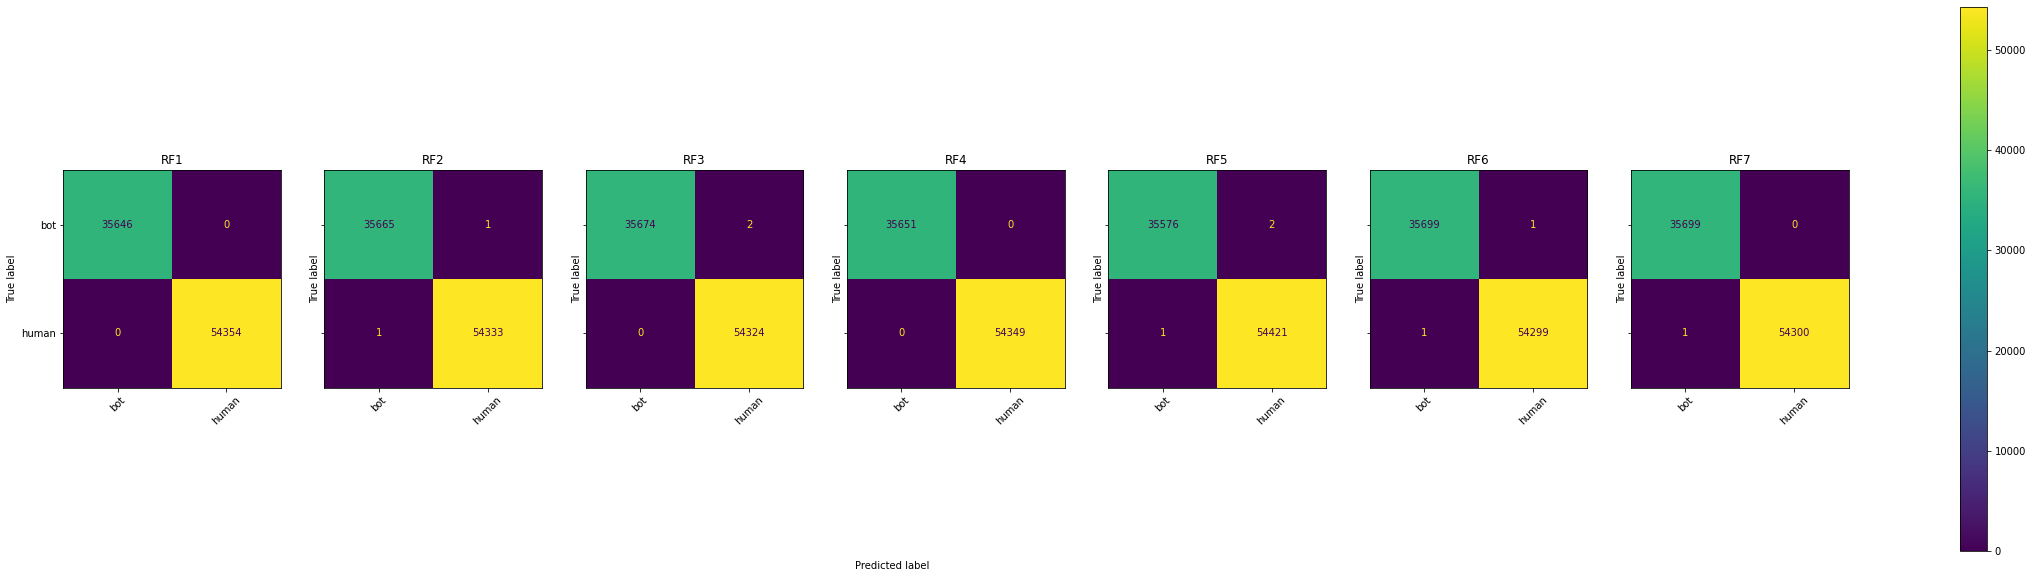

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,1.000000,1.000000,1.000000,35646,1.000000,1.000000,1.000000,54354,1.000000
1,RF2,0.999972,0.999972,0.999972,35666,0.999982,0.999982,0.999982,54334,0.999978
2,RF3,1.000000,0.999944,0.999972,35676,0.999963,1.000000,0.999982,54324,0.999978
3,RF4,1.000000,1.000000,1.000000,35651,1.000000,1.000000,1.000000,54349,1.000000
4,RF5,0.999972,0.999944,0.999958,35578,0.999963,0.999982,0.999972,54422,0.999967
5,RF6,0.999972,0.999972,0.999972,35700,0.999982,0.999982,0.999982,54300,0.999978
6,RF7,0.999972,1.000000,0.999986,35699,1.000000,0.999982,0.999991,54301,0.999989


In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["train"+str(i+1)], y_predict["train"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

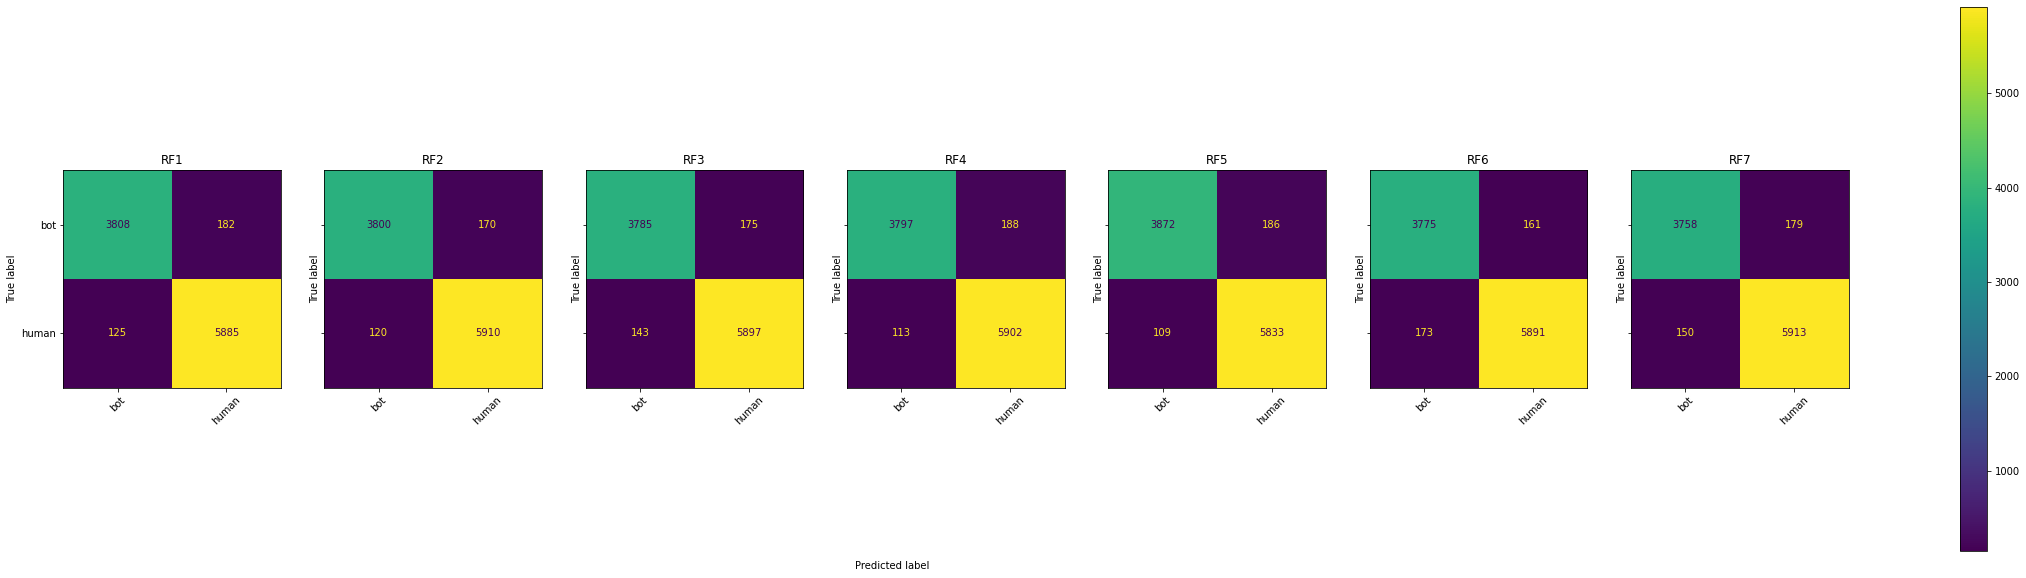

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.968218,0.954386,0.961252,3990,0.970002,0.979201,0.974580,6010,0.9693
1,RF2,0.969388,0.957179,0.963245,3970,0.972039,0.980100,0.976053,6030,0.9710
2,RF3,0.963595,0.955808,0.959686,3960,0.971179,0.976325,0.973745,6040,0.9682
3,RF4,0.971100,0.952823,0.961875,3985,0.969130,0.981214,0.975134,6015,0.9699
4,RF5,0.972620,0.954165,0.963304,4058,0.969098,0.981656,0.975337,5942,0.9705
5,RF6,0.956180,0.959096,0.957636,3936,0.973397,0.971471,0.972433,6064,0.9666
6,RF7,0.961617,0.954534,0.958062,3937,0.970617,0.975260,0.972933,6063,0.9671


In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test"+str(i+1)])
    cf_matrix = confusion_matrix(y["test"+str(i+1)], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["test"+str(i+1)], y_predict["test"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

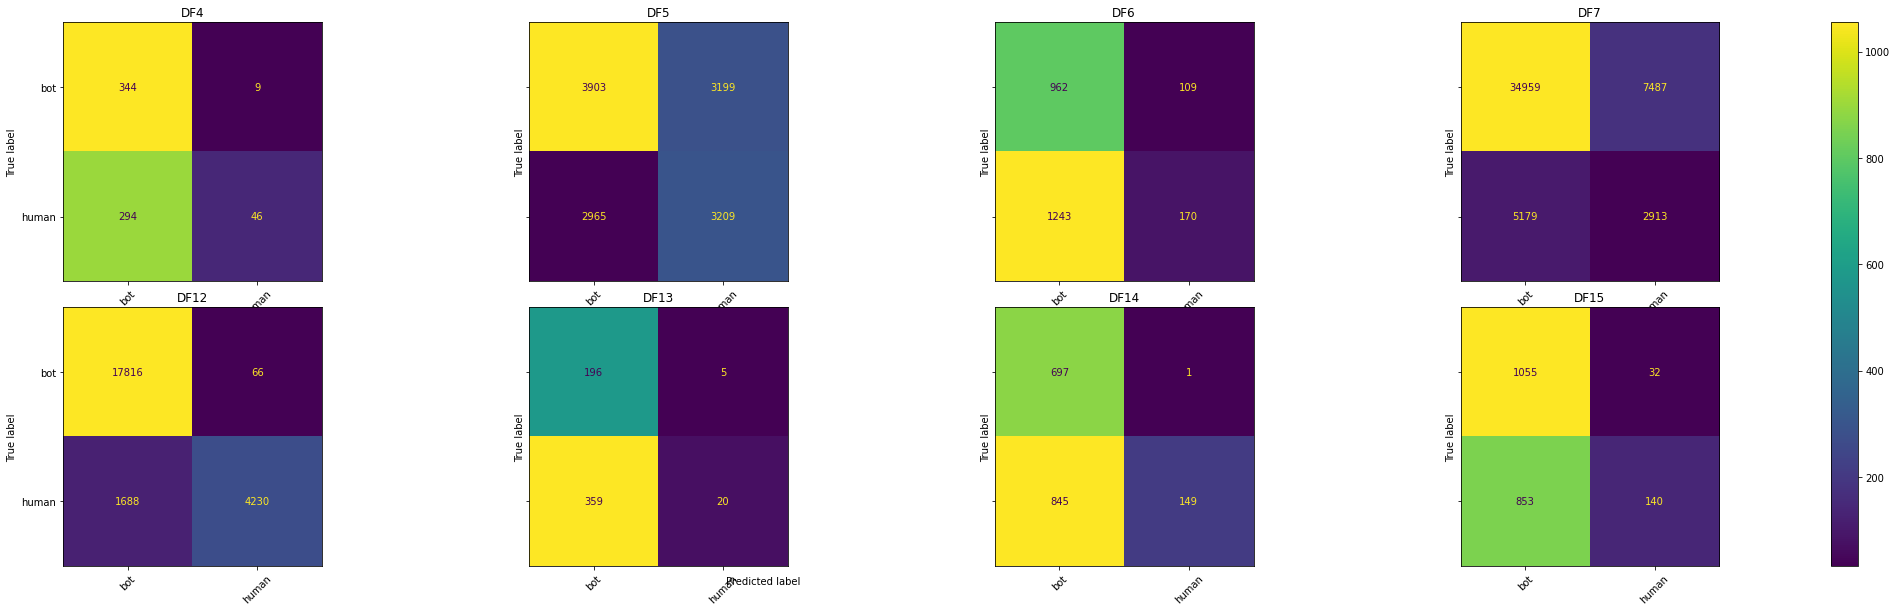

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,DF4,0.539185,0.974504,0.694248,353,0.836364,0.135294,0.232911,340,0.562771
1,DF5,0.568288,0.549564,0.558769,7102,0.500780,0.519760,0.510094,6174,0.535704
2,DF6,0.436281,0.898226,0.587302,1071,0.609319,0.120311,0.200946,1413,0.455717
3,DF7,0.870970,0.823611,0.846629,42446,0.280096,0.359985,0.315055,8092,0.749377
4,DF12,0.913454,0.996309,0.953084,17882,0.984637,0.714769,0.828275,5918,0.926303
5,DF13,0.353153,0.975124,0.518519,201,0.800000,0.052770,0.099010,379,0.372414
6,DF14,0.452010,0.998567,0.622321,698,0.993333,0.149899,0.260490,994,0.500000
7,DF15,0.552935,0.970561,0.704508,1087,0.813953,0.140987,0.240343,993,0.574519


In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_new_predict={}
  for i, (key, clas_f) in enumerate(classifer.items()):
    local_data=test.drop(['class'],axis=1)
    local_data=local_data.iloc[:, columns_list[i]]
    y_new_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(local_data)
  output_prediction=list()
  for index_2,value in enumerate(y_new_predict["test1"]):
    if [y_new_predict["test1"][index_2],y_new_predict["test2"][index_2],y_new_predict["test3"][index_2],y_new_predict["test4"][index_2],y_new_predict["test5"][index_2],y_new_predict["test6"][index_2],y_new_predict["test7"][index_2]].count("bot")>3:
      output_prediction.append("bot")
    else:
      output_prediction.append("human")
  output_prediction = np.array(output_prediction)

  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], output_prediction,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], output_prediction)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)